In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

## DA HW 5

### Напишіть програму на Python:

####  a. щоб завантажити дані ірису з вказаного файлу csv у dataframe та надрукувати форму даних, тип даних та перші 3 рядки.

In [5]:
iris_data = load_iris()
species_dict = {i: name for i, name in enumerate(iris_data.target_names)}

iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['species_id'] = iris_data.target
iris_df['species_name'] = iris_df['species_id'].map(species_dict)

# save *.csv file from sklearn.datasets:
filename = 'iris_data.csv'
iris_df.to_csv(filename, index=False)

#read *.csv file:
df = pd.read_csv(filename)

#RESULT:
print(f'Форма даних: {df.shape}')
print(f'Тип даних: {type(df)}')
print(f'Перші три рядки: \n{df.head(3)}')
df.head(3)

Форма даних: (150, 6)
Тип даних: <class 'pandas.core.frame.DataFrame'>
Перші три рядки: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   species_id species_name  
0           0       setosa  
1           0       setosa  
2           0       setosa  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


#### b. за допомогою Scikit-learn, щоб надрукувати ключі, кількість рядків-стовпців, назви ознак та опис даних Ірису.

In [6]:
print(f'\nКлючі набору: {iris_data.keys()}')
print(f'\nКількість рядків і стовпців: {iris_data.data.shape}')
print(f'\nНазви ознак: {iris_data.feature_names}')
print(f'\nОпис даних:\n{iris_data.DESCR}')


Ключі набору: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Кількість рядків і стовпців: (150, 4)

Назви ознак: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Опис даних:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43 

#### c. щоб переглянути базові статистичні деталі, як-от перцентиль, середнє, стандартне відхилення тощо даних ірису.

In [137]:
all_species_info = df.drop(columns=['species_id', 'species_name']).describe()
print(all_species_info)
all_species_info

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### d. щоб отримати спостереження кожного виду (сетоза, версиколор, віргініка) з даних ірису.

In [141]:
species = df['species_name'].unique()

for s in species:
    info = df[df['species_name'] == s].drop(columns=['species_id', 'species_name']).describe()
    print(f'\nAnalysis of {s.upper()}\n {info}')


Analysis of SETOSA
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  

Analysis of VERSICOLOR
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean

#### e. щоб створити графік для отримання загальної статистики даних Ірис.

##### check nullables:

In [160]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species_id           0
species_name         0
dtype: int64

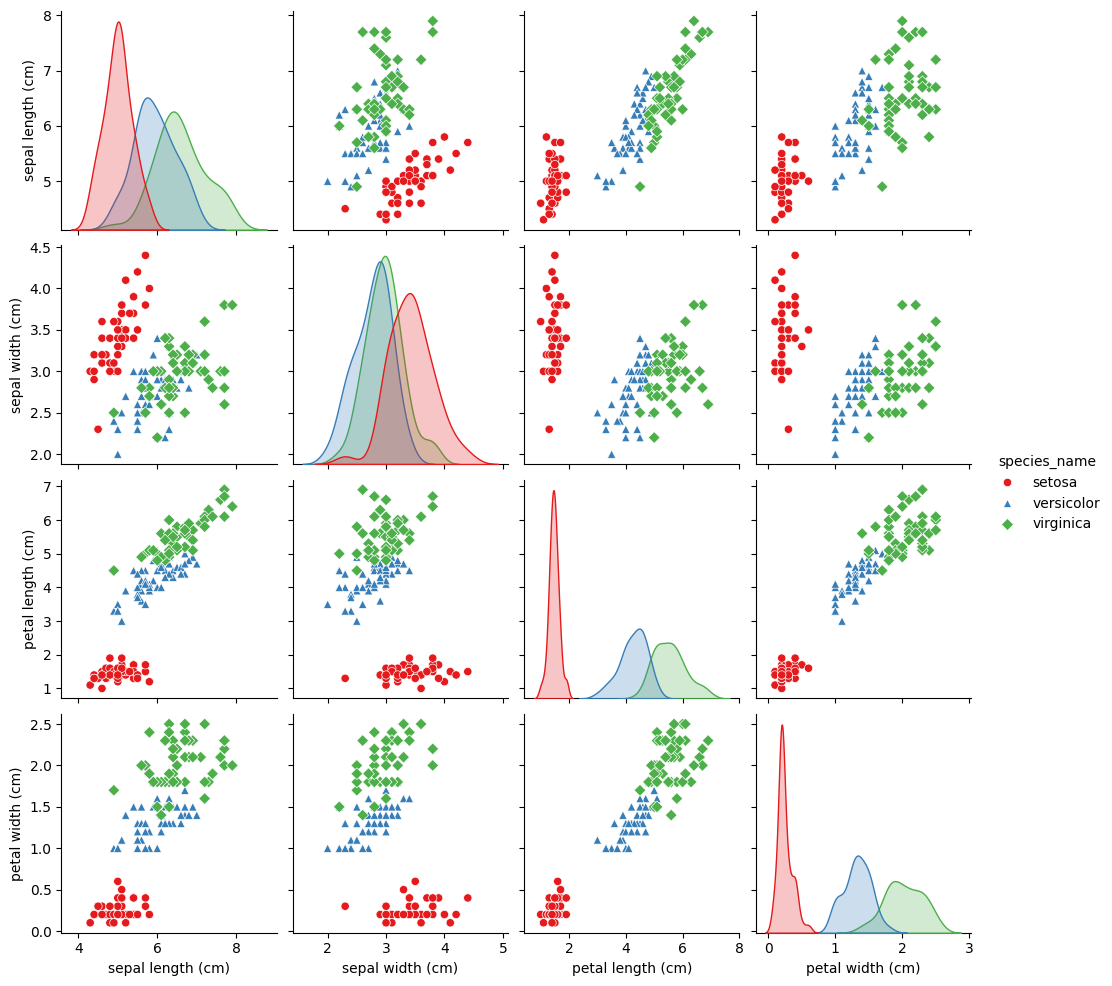

In [161]:
sns.pairplot(data=df.drop(columns=['species_id']), hue='species_name', palette='Set1', markers=["o", "^", "D"])
None

#### f. Напишіть програму на Python, щоб створити стовпчасту діаграму для визначення частоти трьох видів Ірис.

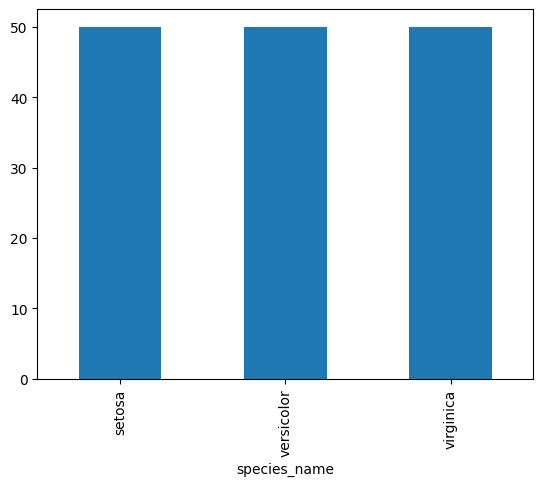

In [168]:
df['species_name'].value_counts().plot(kind='bar')
None

#### g. для розподілу набору даних ірисів на його атрибути (X) та мітки (y). Змінна X містить перші чотири стовпці (тобто атрибути), а y містить мітки набору даних

In [175]:
x = iris_data.data
y = iris_data.target

#### h. за допомогою Scikit-learn для розділення набору даних ірисів на 70% тренувальних даних та 30% тестових даних. 

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=42)

print(f'train x shape: {x_train.shape}')
print(f'train y shape: {y_train.shape}')
print(f'test x shape: {x_test.shape}')
print(f'test y shape: {y_test.shape}')

train x: (105, 4)
train y: (105,)
test x: (45, 4)
test y: (45,)


#### З загальної кількості 150 записів, набір для тренування міститиме 120 записів, а тестовий набір - 30 з цих записів. Виведіть обидва набори даних.

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, train_size=120, random_state=42)

print(f'train x shape: {x_train.shape}')
print(f'train y shape: {y_train.shape}')
print(f'test x shape: {x_test.shape}')
print(f'test y shape: {y_test.shape}')

train x shape: (120, 4)
train y shape: (120,)
test x shape: (30, 4)
test y shape: (30,)


#### i. Напишіть програму на Python за допомогою Scikit-learn для перетворення стовпців видів у числовий стовпець набору даних ірисів. Для кодування цих даних кожне значення перетворіть на число. Наприклад, Iris-setosa:0, Iris-versicolor:1 та Iris-virginica:2. Тепер виведіть набір даних ірисів на 80% тренувальних даних і 20% тестових даних. З загальної кількості 150 записів, набір для тренування міститиме 120 записів, а тестовий набір - 30 з цих записів. Виведіть обидва набори даних.

In [247]:
# Encoding species column
enc = LabelEncoder()
df['encoded_species'] = enc.fit_transform(df['species_name']).reshape(-1, 1)

x = df.drop(columns=['species_id', 'species_name', 'encoded_species']).to_numpy()
y = df['encoded_species'].to_numpy()

# Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=42)
print(f'\ntrain x {x_train.shape}:')
print(x_train)

print(f'\ntrain y {y_train.shape}:')
print(y_train)
print(f'\ntest x {x_test.shape}:')
print(x_test)
print(f'\ntest y {y_test.shape}:')
print(y_test)


train x (120, 4):
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.

#### j. Напишіть програму на Python за допомогою Scikit-learn для розділення набору даних ірисів на 70% тренувальних даних та 30% тестових даних. З загальної кількості 150 записів, набір для тренування міститиме 105 записів, а тестовий набір - 45 з цих записів. Прогнозуйте відповідь для тестового набору даних (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) за допомогою алгоритму найближчих сусідів (K Nearest Neighbor Algorithm). Використовуйте 5 як кількість сусідів.

In [29]:
x = iris_data.data
y = iris_data.target
# data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(y_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [28]:
# metrics
score = knn.score(x_test, y_test)
acc_score = accuracy_score(y_test, y_pred)

print(f'Score: {score}')
print(f'Accuracy score: {acc_score}')

Score: 1.0
Accuracy score: 1.0
